In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
from matplotlib import pyplot as plt

In [7]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

In [8]:
scale_factor = 1000.0

# Scale the training set's label.
train_df["median_house_value"] /= scale_factor 

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

In [26]:
def create_and_fit_model(my_feature, my_label, batch_size, epochs, learning_rate, my_validation_split):
    my_model =tf.keras.models.Sequential()
    my_model.add(tf.keras.layers.Dense(units=1,input_shape=(1,)))
    my_model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = learning_rate),
                     loss = 'mean_squared_error',
                     metrics = tf.keras.metrics.RootMeanSquaredError())
    History = my_model.fit(x = my_feature,
                           y = my_label,
                           batch_size = batch_size,
                           epochs = epochs,
                           validation_split = my_validation_split)
    
    trained_weight = my_model.get_weights()[0]
    trained_bias = my_model.get_weights()[1]
    hist = pd.DataFrame(History.history)
    epochs_from_model = History.epoch
    rmse = History.history["root_mean_squared_error"]
    return(trained_weight, trained_bias, epochs_from_model, rmse, my_model, History)

def fun(x,trained_weight,trained_bias):
    return(trained_bias + trained_weight * x)

def get_new_labels(trained_weight, trained_bias, my_features):
    return([fun(x,trained_weight[0][0], trained_bias[0]) for x in my_feature])

def plot_original_and_predicted_label(my_feature, my_label, model_label_output):
    fig = go.Figure()


    fig.add_trace(go.Scatter(x = my_feature, y = my_label,
                    mode ='markers', name = 'Original labels'))

    fig.add_trace(go.Scatter(x = my_feature, y = model_label_output,
                    mode = 'lines+markers',
                    name = 'Predicted labels'))

    fig.update_layout(title = 'Comparsion chart between predicted and original labels',
                 title_x = 0.5)
    fig.show()


def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  

## Task 1:

In [28]:
learning_rate = 0.08
epochs = 30
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split = 0.2

# Identify the feature and the label.
my_feature = train_df["median_income"]    # the median income on a specific city block.
my_label = train_df["median_house_value"] # the median house value on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

# Invoke the functions to build and train the model.
trained_weight, trained_bias, epochs_from_model, rmse, my_model, History = create_and_fit_model(my_feature,
                                                                             my_label, batch_size,
                                                                             epochs, learning_rate, validation_split)

Epoch 1/30
136/136 [==============================] - 0s 822us/step - loss: 40425.2422 - root_mean_squared_error: 201.0603 - val_loss: 49041.9805 - val_root_mean_squared_error: 221.4542
Epoch 2/30
136/136 [==============================] - 0s 464us/step - loss: 23289.8379 - root_mean_squared_error: 152.6101 - val_loss: 28685.6211 - val_root_mean_squared_error: 169.3683
Epoch 3/30
136/136 [==============================] - 0s 455us/step - loss: 12427.5938 - root_mean_squared_error: 111.4791 - val_loss: 15619.4248 - val_root_mean_squared_error: 124.9777
Epoch 4/30
136/136 [==============================] - 0s 473us/step - loss: 7333.2935 - root_mean_squared_error: 85.6347 - val_loss: 9582.2334 - val_root_mean_squared_error: 97.8889
Epoch 5/30
136/136 [==============================] - 0s 464us/step - loss: 6514.5957 - root_mean_squared_error: 80.7130 - val_loss: 9222.6758 - val_root_mean_squared_error: 96.0348
Epoch 6/30
136/136 [==============================] - 0s 459us/step - loss: 65

88.67717742919922


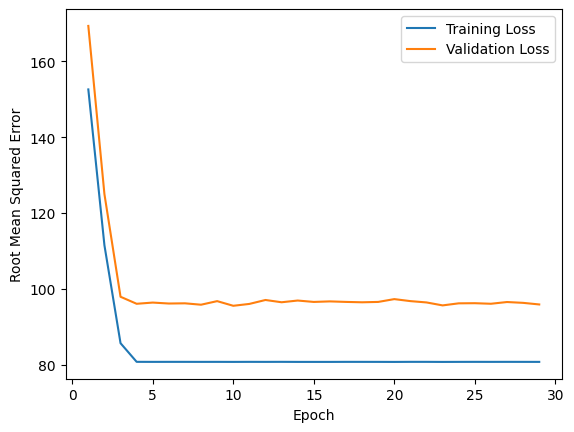

In [30]:
plot_the_loss_curve(epochs_from_model, History.history["root_mean_squared_error"], 
                    History.history["val_root_mean_squared_error"])

### Probemos con otro validation_split:

In [34]:
validation_split = 0.5
trained_weight, trained_bias, epochs_from_model, rmse, my_model, History = create_and_fit_model(my_feature,
                                                                             my_label, batch_size,
                                                                             epochs, learning_rate, validation_split)

Epoch 1/30
85/85 [==============================] - 0s 1ms/step - loss: 52016.9023 - root_mean_squared_error: 228.0721 - val_loss: 41644.1055 - val_root_mean_squared_error: 204.0689
Epoch 2/30
85/85 [==============================] - 0s 727us/step - loss: 38274.8125 - root_mean_squared_error: 195.6395 - val_loss: 29924.4180 - val_root_mean_squared_error: 172.9868
Epoch 3/30
85/85 [==============================] - 0s 738us/step - loss: 27223.8613 - root_mean_squared_error: 164.9966 - val_loss: 20716.6992 - val_root_mean_squared_error: 143.9330
Epoch 4/30
85/85 [==============================] - 0s 730us/step - loss: 18613.2852 - root_mean_squared_error: 136.4305 - val_loss: 13916.6494 - val_root_mean_squared_error: 117.9688
Epoch 5/30
85/85 [==============================] - 0s 730us/step - loss: 12414.7744 - root_mean_squared_error: 111.4216 - val_loss: 9535.2705 - val_root_mean_squared_error: 97.6487
Epoch 6/30
85/85 [==============================] - 0s 795us/step - loss: 8660.8203 

113.2083740234375


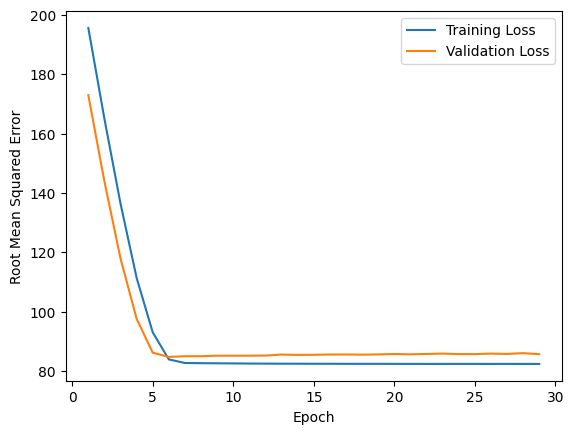

In [35]:
plot_the_loss_curve(epochs_from_model, History.history["root_mean_squared_error"], 
                    History.history["val_root_mean_squared_error"])

In [38]:
validation_split = 0.35
trained_weight, trained_bias, epochs_from_model, rmse, my_model, History = create_and_fit_model(my_feature,
                                                                             my_label, batch_size,
                                                                             epochs, learning_rate, validation_split)

Epoch 1/30
85/85 [==============================] - 0s 1ms/step - loss: 47552.1680 - root_mean_squared_error: 218.0646 - val_loss: 37810.6016 - val_root_mean_squared_error: 194.4495
Epoch 2/30
85/85 [==============================] - 0s 746us/step - loss: 34608.6484 - root_mean_squared_error: 186.0340 - val_loss: 26798.5312 - val_root_mean_squared_error: 163.7026
Epoch 3/30
85/85 [==============================] - 0s 710us/step - loss: 24249.4199 - root_mean_squared_error: 155.7223 - val_loss: 18326.9023 - val_root_mean_squared_error: 135.3769
Epoch 4/30
85/85 [==============================] - 0s 697us/step - loss: 16438.0332 - root_mean_squared_error: 128.2109 - val_loss: 12275.1494 - val_root_mean_squared_error: 110.7933
Epoch 5/30
85/85 [==============================] - 0s 714us/step - loss: 11009.7607 - root_mean_squared_error: 104.9274 - val_loss: 8617.7656 - val_root_mean_squared_error: 92.8319
Epoch 6/30
85/85 [==============================] - 0s 710us/step - loss: 7908.5093 

101.45982360839844


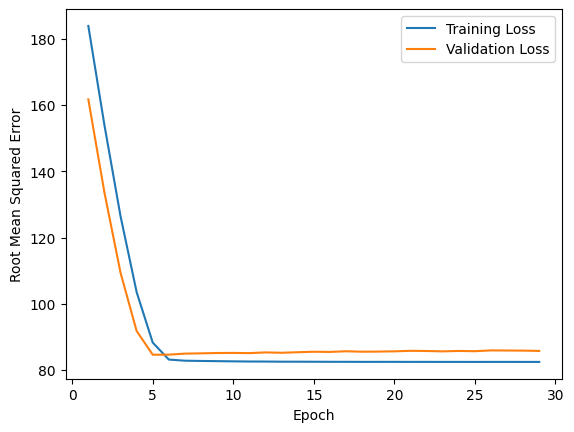

In [37]:
plot_the_loss_curve(epochs_from_model, History.history["root_mean_squared_error"], 
                    History.history["val_root_mean_squared_error"])

## Task 2:

### Las curvas de loss de training y validation deberian ser casi iguales. Aunque variemos el validation_split, vemos que sigue sin concordar.

### Investiguemos los datos:

In [39]:
train_df.head(100)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66.9
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80.1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85.7
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73.4
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65.5
...,...,...,...,...,...,...,...,...,...
95,-115.58,32.81,5.0,805.0,143.0,458.0,143.0,4.4750,96.3
96,-115.58,32.81,10.0,1088.0,203.0,533.0,201.0,3.6597,87.5
97,-115.58,32.79,14.0,1687.0,507.0,762.0,451.0,1.6635,64.4
98,-115.58,32.78,5.0,2494.0,414.0,1416.0,421.0,5.7843,110.1


### Podemos ver que tanto "latitude" y "longitude" estan ordenados. Los que cusa que los datos de entrenamiento no sean similares a los de validacion.


## Resolvamos este problema, haciendo una permutacion de los valores (Task 3):

In [40]:
validation_split = 0.2
shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index))
# Identify the feature and the label.
my_feature = shuffled_train_df["median_income"]    # the median income on a specific city block.
my_label = shuffled_train_df["median_house_value"] # the median house value on a specific city block.
# Invoke the functions to build and train the model.
trained_weight, trained_bias, epochs_from_model, rmse, my_model, History = create_and_fit_model(my_feature,
                                                                             my_label, batch_size,
                                                                             epochs, learning_rate, validation_split)

Epoch 1/30
136/136 [==============================] - 0s 775us/step - loss: 46571.7031 - root_mean_squared_error: 215.8048 - val_loss: 35460.8945 - val_root_mean_squared_error: 188.3106
Epoch 2/30
136/136 [==============================] - 0s 487us/step - loss: 27641.0898 - root_mean_squared_error: 166.2561 - val_loss: 19980.4121 - val_root_mean_squared_error: 141.3521
Epoch 3/30
136/136 [==============================] - 0s 509us/step - loss: 14897.0244 - root_mean_squared_error: 122.0534 - val_loss: 10612.7695 - val_root_mean_squared_error: 103.0183
Epoch 4/30
136/136 [==============================] - 0s 530us/step - loss: 8460.9219 - root_mean_squared_error: 91.9833 - val_loss: 7175.1226 - val_root_mean_squared_error: 84.7061
Epoch 5/30
136/136 [==============================] - 0s 461us/step - loss: 7019.6675 - root_mean_squared_error: 83.7835 - val_loss: 7053.6553 - val_root_mean_squared_error: 83.9860
Epoch 6/30
136/136 [==============================] - 0s 471us/step - loss: 70

82.58497619628906


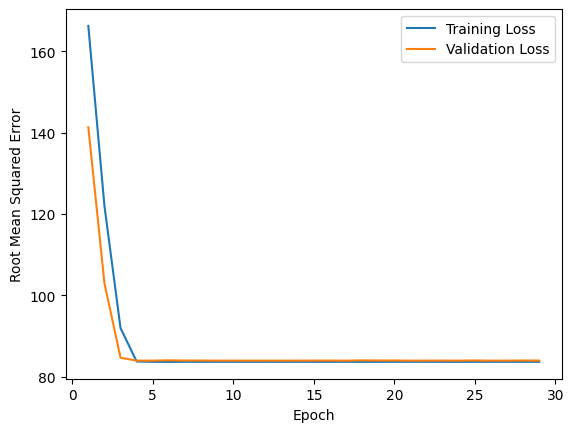

In [41]:
plot_the_loss_curve(epochs_from_model, History.history["root_mean_squared_error"], 
                    History.history["val_root_mean_squared_error"])

## Task 4:

In [43]:
x_test = test_df["median_income"]
y_test = test_df["median_house_value"]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

30/30 [==============================] - 0s 358us/step - loss: 7008.3052 - root_mean_squared_error: 83.7156


In [48]:
print(f' Train root_mean_squared_error is {History.history["root_mean_squared_error"][-1]}')
print(f' Validation root_mean_squared_error is {History.history["val_root_mean_squared_error"][-1]}')
print(f' Evalueate root_mean_squared_error is {results[1]}')


 Train root_mean_squared_error is 83.69750213623047
 Validation root_mean_squared_error is 84.0015869140625
 Evalueate root_mean_squared_error is 83.71562194824219
